# Imports

In [85]:
import pandas as pd
from uk_stemmer import UkStemmer
from nltk.tokenize import word_tokenize
import re
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import joblib

In [26]:
stemmer = UkStemmer()

incorrect_stopwords = ['рос']

with open('./data/stopwords_ua.txt') as f_stopwords:
    stopwords = [x.replace('\n', '') for x in f_stopwords.readlines()]
    stopwords = [sw for sw in stopwords if sw not in incorrect_stopwords]

num_re = re.compile(r'\d+')
words_re = re.compile(r'\w+')

def prepare_uk(text: str) -> str:
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem_word(t) for t in tokens]
    tokens = [t for t in tokens if t not in punctuation]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if num_re.match(t) is None]
    tokens = [t for t in tokens if words_re.match(t) is not None]

    return ' '.join(tokens)

# Parse

In [27]:
df = pd.read_csv('./data/uknews.csv')

df

,title,text,tags,target
0,"ВЕРНИДУБ: «Наносимо 25 ударів, 15 у ворота, а ...",Головний тренер солігорського «Шахтаря» Юрій В...,Футбол|Інші новини|Шахтар Солігорськ|Юрій Верн...,спорт
1,"У ""Київстар"" заявляють, що їх обшукала ДФС",Про це на своїй сторінці у Facebook написав пр...,|Київстар|Новини|податкова|ДФС|обшук|,новини
2,В 2016 році 1% найзаможніших людей вперше ста...,Про це повідомляється в доповіді некомерційної...,|багатство|найбагатші люди світу|Новини|бідність|,новини
3,Шакіл О’Ніл продав шикарний маєток у Флориді в...,Легенда НБА Шакіл О’Ніл продав свій маєток у ...,США|Баскетбол|Флорида|Фото,спорт
4,"У «заблокованій» СБУ B2B Jewelry заявили, що п...",Засновник фінансової піраміди B2B Jewelry Мик...,Служба безпеки України (СБУ)|Финансовая пирами...,бізнес
...,...,...,...,...
120412,Моряка Ейдера могли заразити гепатитом під ча...,Про це заявила Уповноважена Верховної Ради Укр...,|Керченська протока|Людмила Денісова|Андрій Ей...,новини
120413,"""Укргазвидобування"" працює в інтересах російс...",Про це сьогодні на брифінгу у Верховній Раді з...,|Михайло Головко|Росія|Новини|Укргазвидобування|,політика
120414,До 300 Мвт на годину. Україна відновила імпорт...,України 1 лютого почала здійснювати імпорт ел...,Енергетика|Електроенергія,бізнес
120415,"Берлусконі каже, що анексія Криму була ""демок...",Про це повідомляє Еспресо.TV з посиланням на R...,|анексія Криму|Росія|Сільвіо Берлусконі|Новини...,політика


In [28]:
df['text_preprocessed'] = df['text'].apply(prepare_uk)

In [29]:
df

,title,text,tags,target,text_preprocessed
0,"ВЕРНИДУБ: «Наносимо 25 ударів, 15 у ворота, а ...",Головний тренер солігорського «Шахтаря» Юрій В...,Футбол|Інші новини|Шахтар Солігорськ|Юрій Верн...,спорт,головн тренер солігорськ шахтар юр вернидуб пі...
1,"У ""Київстар"" заявляють, що їх обшукала ДФС",Про це на своїй сторінці у Facebook написав пр...,|Київстар|Новини|податкова|ДФС|обшук|,новини,сво сторінц facebook напис президент компані п...
2,В 2016 році 1% найзаможніших людей вперше ста...,Про це повідомляється в доповіді некомерційної...,|багатство|найбагатші люди світу|Новини|бідність|,новини,повідомляєт доповід некомерційн організаці oxf...
3,Шакіл О’Ніл продав шикарний маєток у Флориді в...,Легенда НБА Шакіл О’Ніл продав свій маєток у ...,США|Баскетбол|Флорида|Фото,спорт,легенд нба шакіл ніл прод сві маєток флорид ва...
4,"У «заблокованій» СБУ B2B Jewelry заявили, що п...",Засновник фінансової піраміди B2B Jewelry Мик...,Служба безпеки України (СБУ)|Финансовая пирами...,бізнес,засновник фінансов пірамід b2b jewelry микол г...
...,...,...,...,...,...
120412,Моряка Ейдера могли заразити гепатитом під ча...,Про це заявила Уповноважена Верховної Ради Укр...,|Керченська протока|Людмила Денісова|Андрій Ей...,новини,заявил уповноважен верховн рад україн прав люд...
120413,"""Укргазвидобування"" працює в інтересах російс...",Про це сьогодні на брифінгу у Верховній Раді з...,|Михайло Головко|Росія|Новини|Укргазвидобування|,політика,сьогодн брифінг верховн рад заяв народн депута...
120414,До 300 Мвт на годину. Україна відновила імпорт...,України 1 лютого почала здійснювати імпорт ел...,Енергетика|Електроенергія,бізнес,україн лют почал здійснюв імпорт електроенергі...
120415,"Берлусконі каже, що анексія Криму була ""демок...",Про це повідомляє Еспресо.TV з посиланням на R...,|анексія Криму|Росія|Сільвіо Берлусконі|Новини...,політика,повідомля еспресо.tv посиланн reuters кримчан ...


In [89]:
df['target'].unique()

array(['спорт', 'новини', 'бізнес', 'політика', 'технології'],
      dtype=object)

In [90]:
df[df['target'] == 'технології'].head(15)

,title,text,tags,target,text_preprocessed
9,Facebook запустила сервіс для знайомств в Європі,Американська корпорація Facebook запустила в 3...,Facebook,технології,американськ корпорац facebook запустил країн є...
10,Для повідомлень. Huawei запатентувала незвичай...,Інженери Huawei працюють над створенням диспл...,Дисплей|Huawei|Камера,технології,інженер huawei працюют створенн диспле прихова...
16,Людиною і не пахне. Вчені назвали місце з найч...,Кліматологи з Університету Колорадо дослідили...,Клімат|Антарктика|Атмосфера|Забруднення повітр...,технології,кліматолог університет колорад дослідил регіон...
20,Крадіжка замість кашлю. Додаток для відстеженн...,Експерти з кібербезпеки виявили шкідливий дод...,Хакери|Віруси|Вимагання|Коронавірус,технології,експерт кібербезпек виявил шкідлив додаток and...
23,В Україні виростили найбільший у світі алмаз (...,"В Україні виростили найбільший алмаз у світі, ...",відео|алмаз,технології,україн виростил алмаз світ ваг каратів.читайт ...
26,Біля центру Молочного Шляху виявлене радіоджер...,Сигнал отримав назву ASKAP J173608.2-321635. В...,Техно|Новини Техно|Австралія|Космос,технології,сигнал отрим назв askap j173608.2-321635 повто...
42,Ховайте собак. У Росії планують відправити тва...,Російські вчені запропонували відправити у то...,Польоти|Космічний корабель|Тварини|Наукові дос...,технології,російськ вчен запропонув відправит точк лагран...
58,«Найбільше досягнення за останні 5 років». Goo...,Компанія Google заявила про початок використа...,Google|Інтернет|Пошуковик,технології,компан google заявил початок використанн нов у...
59,iPhone пів року пролежав на дні озера і залиши...,Подружжя Клейтон і Хезер Хелкенберги займаютьс...,Техно|Новини Техно|Смартфони|Apple|iPhone|iPho...,технології,подружж клейтон хезер хелкенберг займают дайві...
86,Xiaomi запатентувала гнучкий смартфон з диспле...,Оригінальна конструкція апарату дозволяє витяг...,Техно|Новини Техно|Смартфони|Xiaomi,технології,оригінальн конструкц апарат дозволя витяг дисп...


In [31]:
df.to_csv('./data/uknews_preprocessed', index=False)

In [35]:
df['text_preprocessed'].apply(lambda x: ' '.join(x.split(' ')[:300]))

0         головн тренер солігорськ шахтар юр вернидуб пі...
1         сво сторінц facebook напис президент компані п...
2         повідомляєт доповід некомерційн організаці oxf...
3         легенд нба шакіл ніл прод сві маєток флорид ва...
4         засновник фінансов пірамід b2b jewelry микол г...
                                ...                        
120412    заявил уповноважен верховн рад україн прав люд...
120413    сьогодн брифінг верховн рад заяв народн депута...
120414    україн лют почал здійснюв імпорт електроенергі...
120415    повідомля еспресо.tv посиланн reuters кримчан ...
120416    україн буд дозволен жодн федералізаці засіданн...
Name: text_preprocessed, Length: 120417, dtype: object

<Axes: >

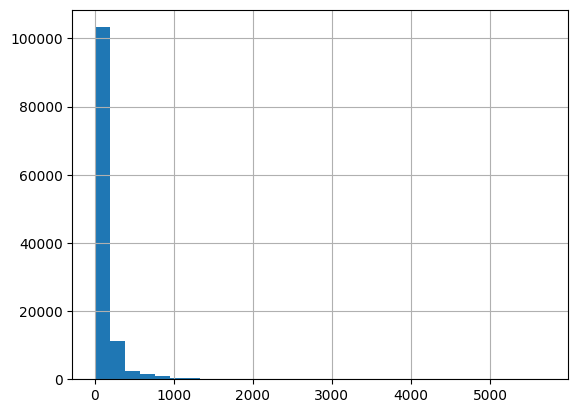

In [88]:
df['text_preprocessed'].apply(lambda x: len(x.split(' '))).hist(bins=30)

<Axes: >

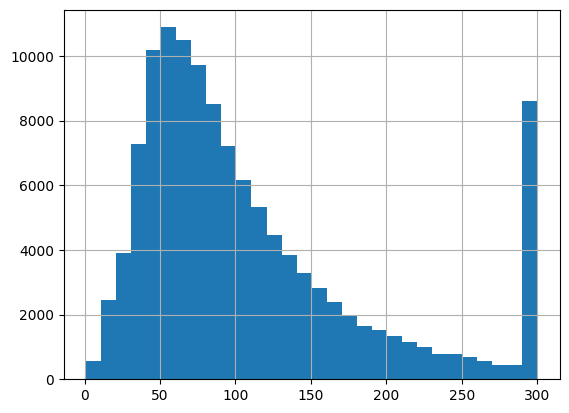

In [36]:
df['text_preprocessed'].apply(lambda x: ' '.join(x.split(' ')[:300])).apply(lambda x: len(x.split(' '))).hist(bins=30)

In [37]:
news = df['text_preprocessed'].apply(lambda x: ' '.join(x.split(' ')[:300]))

In [66]:
cnt_vectorizer = CountVectorizer(min_df=.005, tokenizer=word_tokenize)
X = cnt_vectorizer.fit_transform(news)

len(cnt_vectorizer.get_feature_names_out())

/mnt/e/university/master/text_analysis-labs/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


2981

In [69]:
[y[0] for y in sorted(zip(cnt_vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]), key=lambda x: -x[1])][:100]

['україн',
 'рок',
 'бул',
 'ал',
 'йог',
 'буд',
 'перш',
 'українськ',
 'нов',
 'повідомля',
 'післ',
 'матч',
 'том',
 'заяв',
 'інш',
 'команд',
 'президент',
 'аб',
 'країн',
 'дан',
 'одн',
 'тог',
 'цьог',
 'прот',
 'сказ',
 'сво',
 'нагадаєм',
 'російськ',
 'місц',
 'слов',
 'еспресо.tv',
 'сша',
 'люд',
 'кол',
 'роц',
 'компані',
 'якщ',
 'робот',
 'компан',
 'рішенн',
 'щод',
 'рад',
 'област',
 'стал',
 'цьом',
 'ма',
 'велик',
 'суд',
 'дуж',
 'млн',
 'друг',
 'йдет',
 'гол',
 'груп',
 'можн',
 'отрим',
 'державн',
 '.',
 'світ',
 'близьк',
 'грн',
 'посиланн',
 'тільк',
 'млрд',
 'міністр',
 'бут',
 'сьогодн',
 'головн',
 'зазнач',
 'міст',
 'києв',
 'результат',
 'ді',
 'частин',
 'росі',
 'банк',
 'систем',
 'стан',
 'випадк',
 'повідомленн',
 'національн',
 'останн',
 'склад',
 'будут',
 'можут',
 'прав',
 'клуб',
 'мен',
 'минул',
 'повідом',
 'потрібн',
 'питанн',
 'ринк',
 'місяц',
 'представник',
 'закон',
 'міжнародн',
 'уряд',
 'багат',
 'повідомил']

In [71]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

topic_words = {}
vocab = cnt_vectorizer.get_feature_names_out()

NameError: name 'np' is not defined

In [73]:
for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:10]

    topic_words[topic] = [vocab[i] for i in word_idx]

for k, v in topic_words.items():
    print(k, v)

0 ['україн', 'українськ', 'російськ', 'повідомля', 'район', 'еспресо.tv', 'військов', 'сил', 'област', 'військ']
1 ['бул', 'рок', 'ал', 'нов', 'том', 'інш', 'йог', 'аб', 'люд', 'буд']
2 ['рок', 'україн', 'компані', 'млн', 'грн', 'млрд', 'компан', 'банк', 'ринк', 'бізнес']
3 ['україн', 'заяв', 'президент', 'йог', 'рок', 'повідомля', 'бул', 'суд', 'рад', 'нагадаєм']
4 ['матч', 'команд', 'ал', 'перш', 'україн', 'клуб', 'збірн', 'бул', 'сезон', 'чемпіонат']


In [84]:
selected = news.sample(10)
for i, s in enumerate(selected):
    print(i, s[:170])

vectorized = cnt_vectorizer.transform(selected)
lda.transform(vectorized)

0 спікер верховн рад дмитр разумк брифінг післ погоджувальн рад зміг назв дат розгляд парламент антиколомойськ законопроєкт друг читанн поправок антирекорд українськ парлам
1 повідомля еспресо.tv посиланн російськ служб ввс основн резолюці перекрит зовнішн фінанс поток доставляют кошт бойовик том числ доход контрабанд нафт продаж історичн цінн
2 повідомил міністр освіт наук ліл гриневич годин запитан уряд вр інтерфакс-україн розпочнут незабар останн дзвінк випускн орієнтовн завершенн навчальн рок відбуватимет кла
3 посиланн портал хартыя97 еспресо.tv довір можливост луканомік нул зазнач виданн луканомік білоруськ опозиційн виданн автор називают вибудуван режим лукашенк модел економі
4 повідомля пресцентр штаб оос початк поточн доб ділянк підрозділ обстріл бок противник зафіксован ситуац район проведенн операці єднан сил залишаєт повніст контрольован ук
5 народ україн перемог демократі європейськ реформ напис понеділок twitter
6 повідом координатор варт ігор зінкевич facebook початок бо

array([[0.00111586, 0.0011338 , 0.49538945, 0.48652215, 0.01583874],
       [0.23286483, 0.00299505, 0.45526994, 0.3059032 , 0.00296698],
       [0.00426609, 0.13454275, 0.00430099, 0.60811821, 0.24877195],
       [0.00293044, 0.04431061, 0.59445907, 0.35537112, 0.00292876],
       [0.96777748, 0.00805146, 0.00807341, 0.00805074, 0.0080469 ],
       [0.02271039, 0.02233663, 0.02260635, 0.81351356, 0.11883306],
       [0.31559146, 0.01275154, 0.01264168, 0.64596933, 0.01304599],
       [0.00233698, 0.00230712, 0.50818389, 0.48486576, 0.00230625],
       [0.00639341, 0.00627831, 0.97466192, 0.00635299, 0.00631337],
       [0.23575916, 0.00254505, 0.0025129 , 0.75667452, 0.00250837]])

In [86]:
joblib.dump(lda, 'lda.jl')

['lda.jl']